In [20]:
!pip install pandas xlrd openpyxl seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/294.6 kB ? eta -:--:--
     ------------                            92.2/294.6 kB 2.6 MB/s eta 0:00:01
     -----------------------------          225.3/294.6 kB 2.7 MB/s eta 0:00:01
     -------------------------------------- 294.6/294.6 kB 2.3 MB/s eta 0:00:00


In [25]:
import pandas as pd
import numpy as np

In [45]:
# Вправа 1
excel_file = 'En_In.xls'
skip_rows = 17
skip_footer = 38
columns_to_use = [1, 3, 4, 5]
column_names = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

Energy = pd.read_excel(excel_file, skiprows=skip_rows, skipfooter=skip_footer, usecols=columns_to_use, names=column_names)

# Вправа 2
Energy['Energy Supply'].replace("...", np.NaN, inplace=True)
Energy['Energy Supply per Capita'].replace("...", np.NaN, inplace=True)
Energy['Energy Supply'] = Energy['Energy Supply'] * 1000000

# Вправа 3
country_mapping = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

Energy['Country'].replace(country_mapping, inplace=True)

# Вправа 4
Energy['Country'].replace(to_replace = r'\d+', value = '', regex = True, inplace = True)
Energy['Country'] = Energy['Country'].replace(to_replace = r'\(.*\)', value = '', regex = True).str.strip()
Energy.loc[Energy['Country'].isin(['American Samoa', 'Switzerland', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,NaN,0.641
24,Bolivia,336000000.000,32.000,31.477
197,Switzerland,1113000000.000,136.000,57.745


In [10]:
# Вправа 5
GDP = pd.read_csv('gpd.csv', skiprows=4)

gdp_mapping = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}

GDP['Country Name'].replace(gdp_mapping, inplace=True)
GDP.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2467703910.615,NaN,NaN,NaN,NaN,NaN


In [11]:
# Вправа 6
scimago = pd.read_excel('scimagojr.xlsx')

# Вправа 7
merged_df = pd.merge(scimago, Energy, left_on='Country', right_on='Country')
merged_df = pd.merge(merged_df, GDP, left_on='Country', right_on='Country Name')

selected_columns = ['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
                     'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable',
                     '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

Result = merged_df[selected_columns].set_index('Country').head(15)

Result.head(3)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.700,138,127191000000.000,93.000,19.755,3992331462570.890,4559041383517.930,4997775145605.960,5459247267275.140,6039658508485.590,6612490294273.650,7124977970399.610,7672447738017.420,8230120617793.520,8797998940421.279
United States,2,96661,94747,792274,265436,8.200,230,90838000000.000,286.000,11.571,14792303791800.000,15055395304800.000,15011490541400.000,14594842181900.000,14964372000000.000,15204019634600.000,15542161722300.000,15773666098800.000,16156618476000.000,16548573278300.000
Japan,3,30504,30287,223024,61554,7.310,134,18984000000.000,149.000,10.233,5496541517363.310,5617035943770.730,5558526873313.820,5251308399909.320,5498717815809.770,5473738114222.050,5569101602926.180,5644658523313.420,5642884448582.190,5669563143140.970


In [12]:
# Вправа 8
def task_eight():
    gdp_columns = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    gdp_data = Result[gdp_columns]
    avgGDP = gdp_data.mean(axis=1)
    avgGDP = avgGDP.sort_values(ascending=False)

    return avgGDP

task_eight()

Country
United States        15364344302990.000
China                 6348608932836.100
Japan                 5542207638235.176
Germany               3493025339072.848
France                2681724635761.589
United Kingdom        2487906661418.417
Brazil                2189794143774.905
Italy                 2120175089933.776
India                 1769297396603.860
Canada                1660647466307.512
Russian Federation    1565459478480.661
Spain                 1418078278145.694
Australia             1164042729991.427
South Korea           1106714508244.852
Iran                   444155754051.095
dtype: float64

In [38]:
# Вправа 9
def task_nine():
    gdp_columns = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    fifth_highest_gdp_country = task_eight().index[4]
    gdp_values = Result.loc[fifth_highest_gdp_country, gdp_columns]
    gdp_change = gdp_values['2015'] - gdp_values['2006']
    return (fifth_highest_gdp_country, gdp_change)

task_nine()

('France', 153345695364.24023)

In [39]:
def task_ten_modified():
    max_renewable_country = Result['% Renewable'].idxmax()
    max_renewable_percentage = Result['% Renewable'].max()
    return (max_renewable_country, max_renewable_percentage)

task_ten_modified()

('Brazil', 69.64803)

In [40]:
# Вправа 11
def task_eleven():
    Result['Population Estimate'] = Result['Energy Supply'] / Result['Energy Supply per Capita']
    sorted = Result.sort_values(by='Population Estimate', ascending=False)
    sixth_country = sorted.iloc[5]
    return (sixth_country.name, sixth_country['Population Estimate'])

task_eleven()

('Japan', 127409395.97315437)

In [41]:
# Вправа 12
def task_twelve():
    Result['Citations per Capita'] = Result['Citable documents'] / Result['Population Estimate']
    correlation = Result['Citations per Capita'].corr(Result['Energy Supply per Capita'])
    return correlation

task_twelve()

0.7940010435442946

In [42]:
def task_thirteen_modified():
    median_renewable = Result['% Renewable'].median()
    high_renewable = (Result['% Renewable'] >= median_renewable).astype(int)
    sorted_result = Result.assign(High_Renewable=high_renewable).sort_values(by='Rank')
    return sorted_result['High_Renewable']

task_thirteen_modified()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: High_Renewable, dtype: int32

In [43]:
# Вправа 14
def task_fourteen():
    ContinentDict = {'China':'Asia', 'United States':'North America', 'Japan':'Asia', 'United Kingdom':'Europe',
                     'Russian Federation':'Europe', 'Canada':'North America', 'Germany':'Europe', 'India':'Asia',
                     'France':'Europe', 'South Korea':'Asia', 'Italy':'Europe', 'Spain':'Europe', 'Iran':'Asia',
                     'Australia':'Australia', 'Brazil':'South America'}

    Result['Continent'] = Result.index.map(ContinentDict)
    grouped_df = Result.groupby('Continent')['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])
    grouped_df.index.name = 'Continent'
    grouped_df.columns = ['size', 'sum', 'mean', 'std']
    return grouped_df

task_fourteen()

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.611,579733277.322,679097888.366
Australia,1,23316017.316,23316017.316,NaN
Europe,6,457929667.216,76321611.203,34647667.066
North America,2,352855249.480,176427624.740,199669644.857
South America,1,205915254.237,205915254.237,NaN


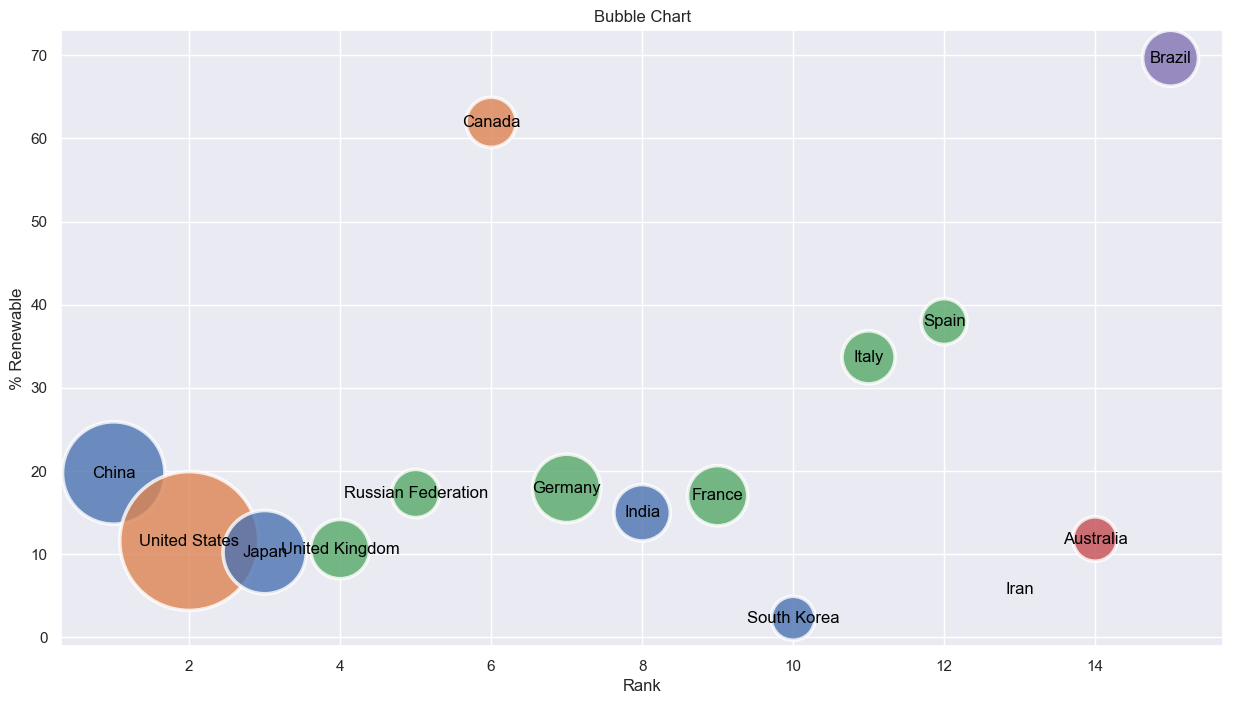

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(15, 8))
bubble_chart = sns.scatterplot(x='Rank', y='% Renewable', size='2015', hue='Continent', data=Result, sizes=(1000, 10000),
                               alpha=0.8, palette=None)

for index, row in Result.iterrows():
    bubble_chart.annotate(index, xy=(row['Rank'], row['% Renewable']), xytext=(0, 0),
                          textcoords='offset points', ha='center', va='center', size='medium', color='black')

plt.title('Bubble Chart')
plt.xlabel('Rank')
plt.ylabel('% Renewable')

bubble_chart.legend().set_visible(False)

plt.show()